In [ ]:
### Created by Shanhong (Olivia) Liu
### 
import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 3 = INFO, WARNING, and ERROR messages are not printed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
# import the dataset
dataset = pd.read_csv('state-farm-distracted-driver-detection/driver_imgs_list.csv')
dataset.head(5)

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [ ]:
dataset.shape

(22424, 3)

In [ ]:
# plot an image for each of 10 classes
import os
from IPython.display import display, Image
import matplotlib.image as mpimg

activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

driverClass = list(activity_map.values())
driverClassLabel = list(activity_map.keys())

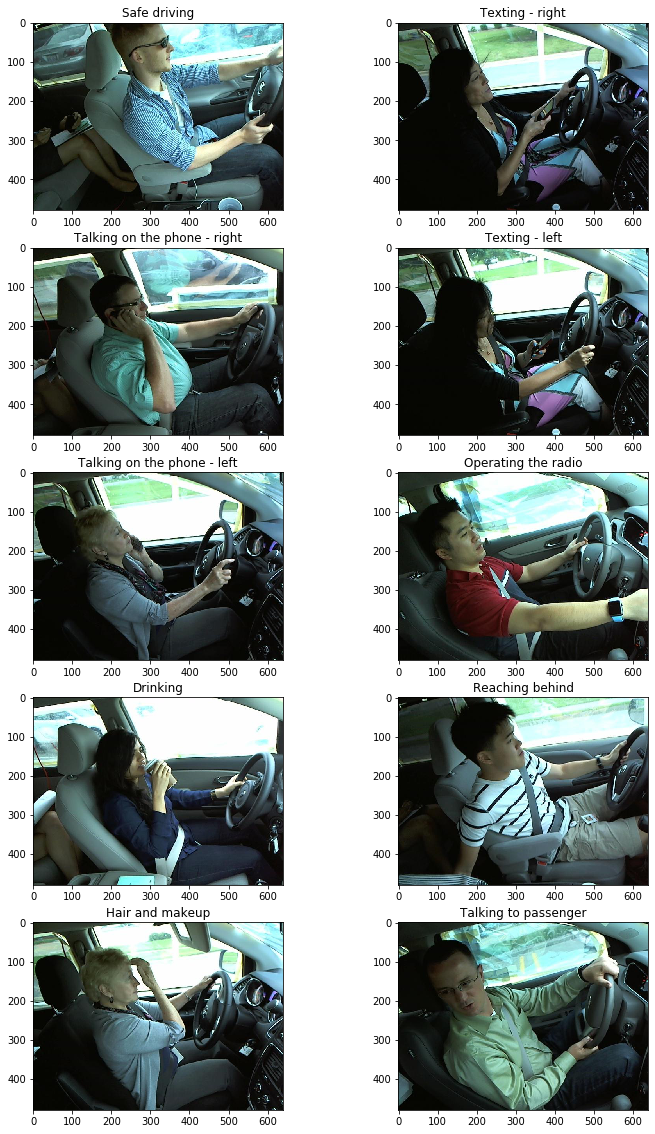

In [ ]:
plt.figure(figsize = (12, 20))
image_count = 1
BASE_URL =  'state-farm-distracted-driver-detection/imgs/train/'
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(5, 2, image_count)
                image_count += 1
                image = mpimg.imread(BASE_URL + directory + '/' + file)
                plt.imshow(image)
                plt.title(activity_map[directory])

In [ ]:
# building the model
classifier = Sequential()
classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', 
                      input_shape = (240, 240, 3), data_format = 'channels_last'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))
classifier.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 238, 238, 128)     3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 119, 119, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 117, 117, 64)      73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [ ]:
#creating training data
train_datagen = ImageDataGenerator(rescale = 1.0/255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   validation_split = 0.2)

training_set = train_datagen.flow_from_directory('state-farm-distracted-driver-detection/imgs/train', 
                                                 target_size = (240, 240), 
                                                 batch_size = 32,
                                                 subset = 'training')

validation_set = train_datagen.flow_from_directory('state-farm-distracted-driver-detection/imgs/train', 
                                                   target_size = (240, 240), 
                                                   batch_size = 32,
                                                   subset = 'validation')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [ ]:
# train the model
classifier.fit_generator(training_set,
                         steps_per_epoch = 17943/32,
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = 4481/32)

Epoch 1/10
561/560 [==============================] - 2919s 5s/step - loss: 2.1368 - accuracy: 0.1970 - val_loss: 1.6904 - val_accuracy: 0.4796
Epoch 2/10
561/560 [==============================] - 4105s 7s/step - loss: 0.6765 - accuracy: 0.7712 - val_loss: 0.0865 - val_accuracy: 0.8799
Epoch 3/10
561/560 [==============================] - 4142s 7s/step - loss: 0.2340 - accuracy: 0.9271 - val_loss: 9.7913e-04 - val_accuracy: 0.9455
Epoch 4/10
561/560 [==============================] - 3550s 6s/step - loss: 0.1400 - accuracy: 0.9576 - val_loss: 4.8400e-05 - val_accuracy: 0.9511
Epoch 5/10
561/560 [==============================] - 4098s 7s/step - loss: 0.1133 - accuracy: 0.9651 - val_loss: 2.9747e-04 - val_accuracy: 0.9672
Epoch 6/10
561/560 [==============================] - 4940s 9s/step - loss: 0.0931 - accuracy: 0.9712 - val_loss: 0.0012 - val_accuracy: 0.9656
Epoch 7/10
561/560 [==============================] - 4788s 9s/step - loss: 0.0788 - accuracy: 0.9755 - val_loss: 2.1458e-06

In [ ]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## organize the training data
dataset = pd.read_csv('state-farm-distracted-driver-detection/driver_imgs_list.csv')
BASE_URL = 'state-farm-distracted-driver-detection/imgs/train/'
trainX = np.zeros([dataset.shape[0],30000])
trainY = np.zeros([dataset.shape[0]])
k = 0
for directory in os.listdir(BASE_URL):
    #if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            image = mpimg.imread(BASE_URL   + directory + "/" + file)
            imgr = resize(image, (100, 100), anti_aliasing=True)
            # trainX.append(imgr)    #np.expand_dims(imgr, axis=0)
            # trainY.append(dataset.classname[dataset.img == file].values[0])
            trainX[k, :] = imgr.ravel()
            trainY[k] = driverClassLabel.index(dataset.classname[dataset.img == file].values[0])
            k += 1
        print(k)

import pickle
# Saving the objects:
with open('state-farm-distracted-driver-detection/trainingData.pkl', 'wb') as f:  
    pickle.dump([trainX, trainY], f)

2489
4756
7073
9419
11745
14057
16382
18384
20295
22424


MemoryError: 

In [ ]:
# organize the testing data
testset = pd.read_csv('state-farm-distracted-driver-detection/testSet2.csv')
BASE_URL = 'state-farm-distracted-driver-detection/imgs/test/'
testX = np.zeros([testset.shape[0], 30000])
testY = np.array(testset.label)
k = 0
for imgFile in testset.img:
    image = mpimg.imread(BASE_URL  + imgFile + '.jpg')
    imgr = resize(image, (100, 100), anti_aliasing=True)
    testX[k,:] = imgr.ravel()
    k += 1

In [ ]:
print(testX.shape)

(99, 30000)


In [ ]:
# other classifier
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainY)

In [ ]:
# train a kNN classifier

from sklearn.neighbors import KNeighborsClassifier
knnModel =  KNeighborsClassifier(3)
knnModel.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
predY = knnModel.predict(testX)

In [ ]:
knntestSetScore = accuracy_score(testY, predY)
print(knntestSetScore)

0.3939393939393939


In [ ]:
# get the 100 randomly picked images from the train set data
trainset = pd.read_csv('state-farm-distracted-driver-detection/trainSet.csv')
BASE_URL = 'state-farm-distracted-driver-detection/trainSet/'
k = 0
trainSetX = np.zeros([trainset.shape[0], 30000])
trainSetY = np.array(trainset.label)
for imgFile in trainset.img:
    image = mpimg.imread(BASE_URL  + str(imgFile) + '.jpg')
    imgr = resize(image, (100, 100), anti_aliasing=True)
    trainSetX[k,:] = imgr.ravel()
    k += 1

In [ ]:
predTrainSetY = knnModel.predict(trainSetX)
knntrainSetScore = accuracy_score(trainSetY, predTrainSetY)
print(knntrainSetScore)

1.0


In [ ]:
## from the smartphone
smartphoneSet = pd.read_csv('state-farm-distracted-driver-detection/smartphone.csv')
BASE_URL = 'state-farm-distracted-driver-detection/smartphone/'
k = 0
smartphoneSetX = np.zeros([smartphoneSet.shape[0], 30000])
smartphoneSetY = np.array(smartphoneSet.label)
for imgFile in smartphoneSet.img:
    image = mpimg.imread(BASE_URL  + str(imgFile) + '.jpg')
    imgr = resize(image, (100, 100), anti_aliasing=True)
    smartphoneSetX[k,:] = imgr.ravel()
    k += 1

In [ ]:
predSmartphoneSetY = knnModel.predict(smartphoneSetX)
knnSmartphoneSetScore = accuracy_score(smartphoneSetY, predSmartphoneSetY)
print(knnSmartphoneSetScore)